In [1]:
#import relevant packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', dpi=120) # set good resolution
import seaborn as sns
sns.set()

In [2]:
#to convert the data from libsvm to numpy
def get_data():    
    data = load_svmlight_file("diabetes_scale.txt")
    return data[0], data[1]

In [3]:
X, y = get_data()
X = X.toarray()
y = y.reshape((-1,1))

#printing the X and y shapes to see if everything works fine
print(X.shape)
print(y.shape)

(768, 8)
(768, 1)


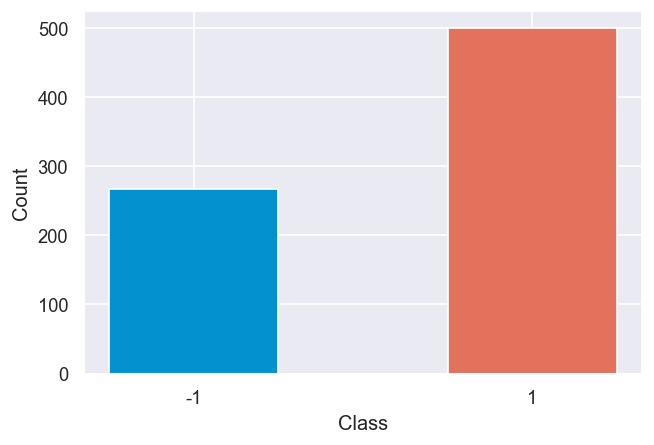

In [4]:
#checking the number of instances of each class
unique, counts = np.unique(y, return_counts=True)
unique = ['-1', '1']
plt.bar(x = unique, height = counts, width = 0.5, color = ["#0392cf", "#e2725b"])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The dataset is imbalanced with 268 negative (-1) classes and 500 positive (+1) classes.

In [5]:
#splitting dataset into 60-20-20 train-val-test sets
X_train, X_bigtest, y_train, y_bigtest = train_test_split(X, y, test_size = 0.4, random_state = 42, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_bigtest, y_bigtest, test_size = 0.5, random_state = 42, stratify = y_bigtest)

# Implementation of Perceptron algorithm

In [6]:
#to add bias term of 1 to each row of features
def add_bias(array):
    return np.append(np.ones(array.shape[0]).reshape(array.shape[0],1), array, axis= 1)

In [7]:
#implement zero-one loss function
def zero_one_loss(feature, weight, label):
    if label * np.dot(feature, weight) < 0:
        return 1
    else:
        return 0

In [8]:
#implement perceptron loss function
def perceptron_loss(feature, weight, label):
    if -1 * label * np.dot(feature, weight) < 0:
        return 0
    else:
        return -1 * label * np.dot(feature, weight)

In [9]:
#implement hinge loss function
def hinge_loss(feature, weight, label):
    if 1 - (label * np.dot(feature, weight)) < 0:
        return 0
    else:
        return 1 - (label * np.dot(feature, weight))

In [10]:
#predicting class by taking inner product of features and weights
def get_predictions(features, weights):
    return np.sign(np.dot(features, weights))

In [11]:
#get accuracy score of our predictions
def pred_accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels) #sklearn function to get accuracy score

In [12]:
#get loss value of our predictions
def loss(features, labels, weights):
    sum_loss = 0
    for row, label in zip(features, labels):
        sum_loss += zero_one_loss(row, weights, label)

    return sum_loss/features.shape[0]

In [13]:
#plot the accuracy curve
def plot_accuracy(results):

   # Plot the results (shifting validation curves appropriately)
   n = len(results)
   gca=plt.gca()
   gca.plot(np.arange(0, n), results['Training Accuracy'], color='orange')
   gca.plot(np.arange(0, n) + 0.5, results['Validation Accuracy'], 'r') # offset validation curves
   gca.legend(['Train Acc','Val Acc'])
   gca.grid(True)
   gca.set_ylim((0, 1)) # set the vertical range to [0-1]
   gca.set_xlabel('Epochs')
   gca.set_ylabel('Accuracy')
   gca.set_title('Accuracy curve')
   plt.show()

In [14]:
#plot the loss curve
def plot_loss(results):

   # Plot the results (shifting validation curves appropriately)
   n = len(results)
   gca=plt.gca()

   gca.plot(np.arange(0, n), results['Training Loss'], 'b')
   gca.plot(np.arange(0, n) + 0.5, results['Validation Loss'], 'g') # offset validation curve
   gca.legend(['Train Loss', 'Val Loss'])
   gca.grid(True)
   gca.set_xlabel('Epochs')
   gca.set_ylabel('Loss')
   gca.set_title('Loss curve')
   plt.show()

In [15]:
#to train the perceptron algorithm by updating weights
def Perceptron_Base(features, labels, features_val, labels_val, learning_rate, epochs = 50, loss_type = 'zero_one', bias = False):

    #random weights initialisation of size 8
    np.random.seed(42)
    weights  = np.random.rand(8)

    #housekeeping to get the data ready if we use a bias term
    if bias:
        features = add_bias(features)
        features_val = add_bias(features_val)

        #random weights initialisation of size 9 in case we use the bias term
        weights  = np.random.rand(9)
    
    #initialise list for appending results
    results = []
    for epoch in range(epochs):         
        summation = 0

        #looping through each row of features and sum up the instances where predictions are incorrect
        for row, label in zip(features, labels):
            if loss_type == 'zero_one':
                summation = summation + (label * row * (zero_one_loss(row, weights, label)))
            elif loss_type == 'perceptron':
                summation = summation + (label * row * (perceptron_loss(row, weights, label)))
            else:
                summation = summation + (label * row * (hinge_loss(row, weights, label)))

        #update the weights
        weights = weights + (learning_rate * summation)
        
        #getting and appending the results to the results litst
        train_preds = get_predictions(features, weights)
        val_preds = get_predictions(features_val, weights)
        train_acc = pred_accuracy(labels, train_preds)
        val_acc = pred_accuracy(labels_val, val_preds)
        train_loss = loss(features, labels, weights)
        val_loss = loss(features_val, labels_val, weights)
        results += [[epoch, learning_rate, bias, loss_type,  weights, train_acc, val_acc, train_loss, val_loss]]
    
    results = pd.DataFrame(results, columns=['Epoch', 'Learning Rate', 'Bias', 'Loss type', 'Weights', 
                                            'Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'])
    plot_accuracy(results)
    plot_loss(results)

    #return the results dataframe with epochs ranked by validation accuracy
    results = results.sort_values('Validation Accuracy', ascending=False, ignore_index = True)    
    return results

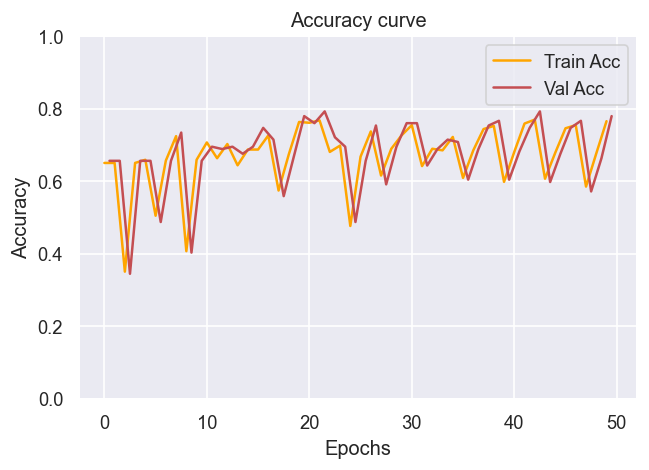

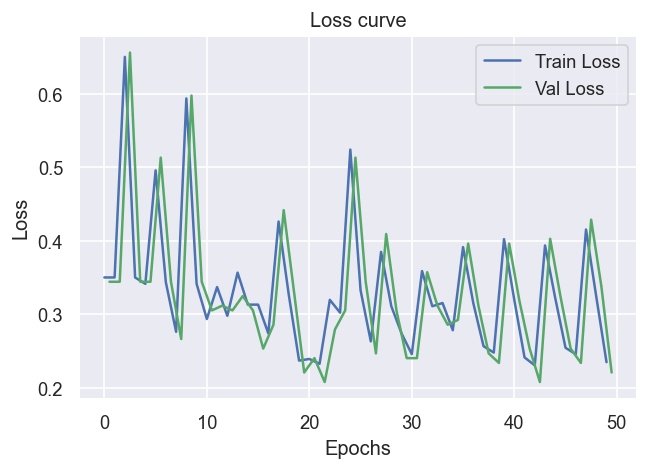

Epoch  Learning Rate   Bias Loss type  \
0     42           0.01  False  zero_one   
1     21           0.01  False  zero_one   
2     49           0.01  False  zero_one   
3     19           0.01  False  zero_one   
4     38           0.01  False  zero_one   
5     46           0.01  False  zero_one   
6     30           0.01  False  zero_one   
7     29           0.01  False  zero_one   
8     20           0.01  False  zero_one   
9     26           0.01  False  zero_one   

                                             Weights  Training Accuracy  \
0  [-0.86899049115262, -2.582652244190084, 0.5864...           0.769565   
1  [-0.6572252161526249, -2.4372251235900833, 0.4...           0.767391   
2  [-0.8025200361526181, -2.7552652599900838, 0.4...           0.765217   
3  [-0.718989871152625, -2.8501396417900833, 0.29...           0.763043   
4  [-0.9319315761526208, -2.6057175917900843, 0.5...           0.752174   
5  [-0.9395788411526191, -2.471496456890084, 0.61...           0.754348   
6  [-0.9301666411526222, -2.6338080329900837, 0.5...           0.754348   
7  [-0.7019312611526222, -2.9448632716900836, 0.3...           0.726087   
8  [-0.604283996152625, -2.680742688690083, 0.342...           0.760870   
9  [-1.056637141152623, -2.6499386948900834, 0.40...           0.736957   

   Validation Accuracy  Training Loss  Validation Loss  
0             0.792208       0.230435         0.207792  
1             0.792208       0.232609         0.207792  
2             0.779221       0.234783         0.220779  
3             0.779221       0.236957         0.220779  
4             0.766234       0.247826         0.233766  
5             0.766234       0.245652         0.233766  
6             0.759740       0.245652         0.240260  
7             0.759740       0.273913         0.240260  
8             0.759740       0.239130         0.240260  
9             0.753247       0.263043         0.246753

In [16]:
#training the baseline perceptron model with default hyperparameters
Perceptron_Base(X_train, y_train, X_val, y_val, learning_rate = 0.01, loss_type='zero_one', bias = False).head(10)

# Experiments and Hyperparameter tuning

Learning Rate = 1e-05 | Loss Type = zero_one | Bias = True


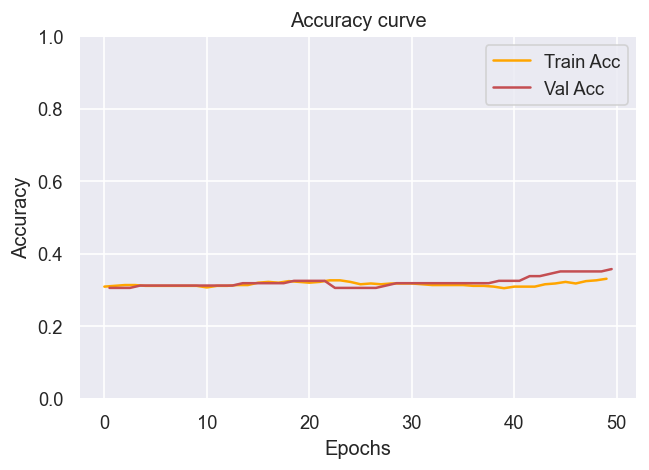

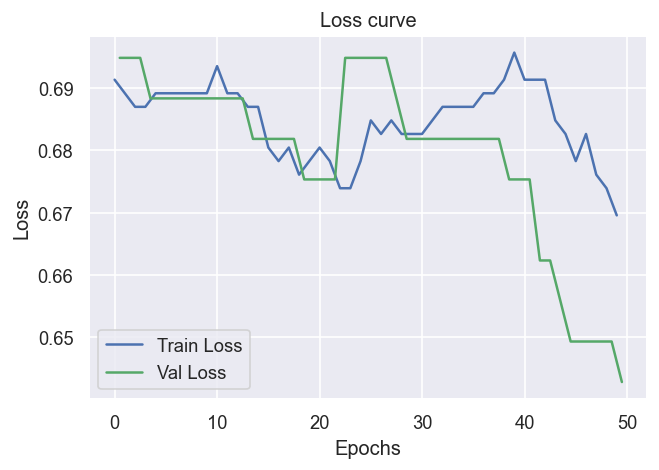

Max Validation Accuracy = 0.35714285714285715

Learning Rate = 1e-05 | Loss Type = zero_one | Bias = False


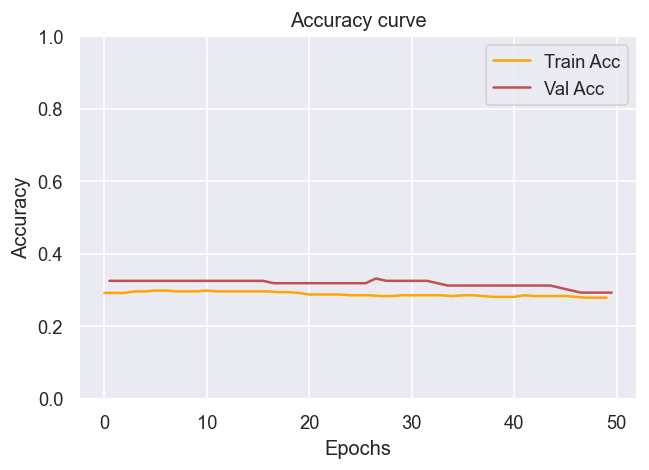

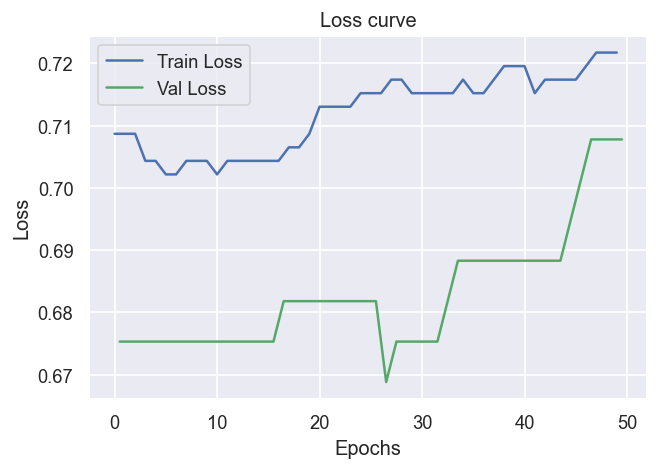

Max Validation Accuracy = 0.33116883116883117

Learning Rate = 1e-05 | Loss Type = hinge | Bias = True


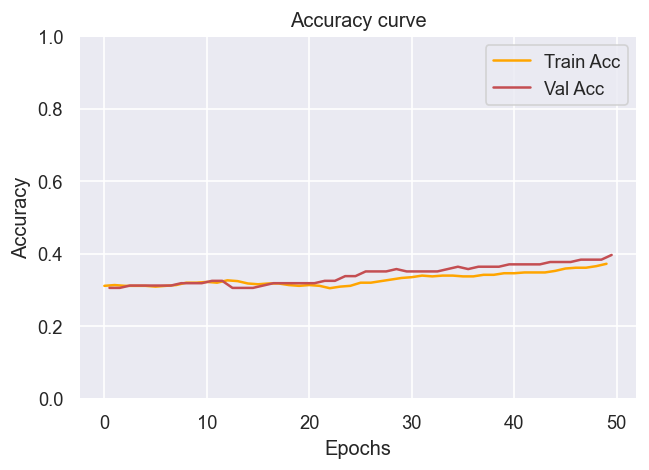

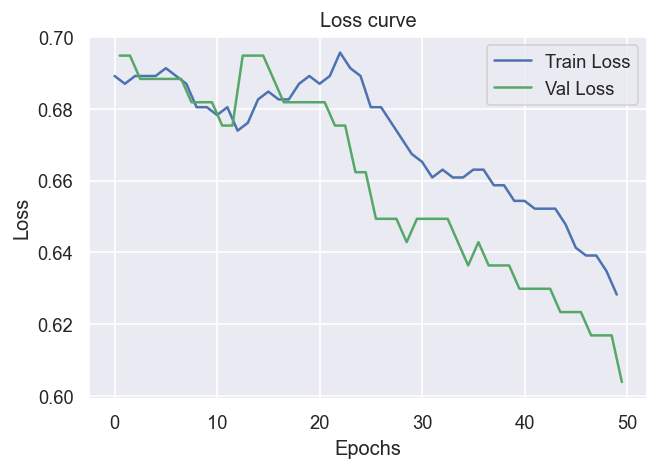

Max Validation Accuracy = 0.3961038961038961

Learning Rate = 1e-05 | Loss Type = hinge | Bias = False


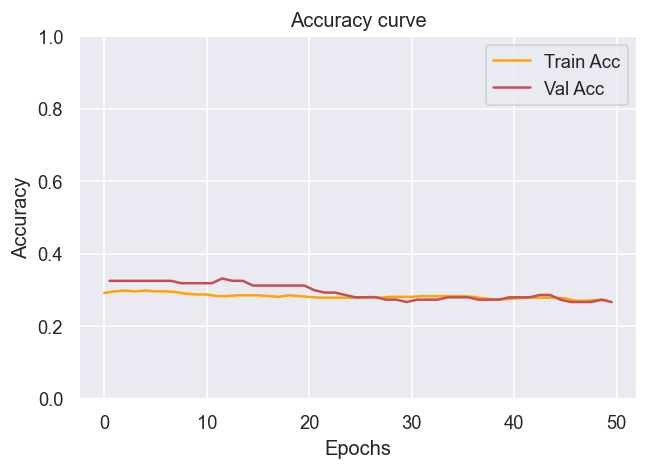

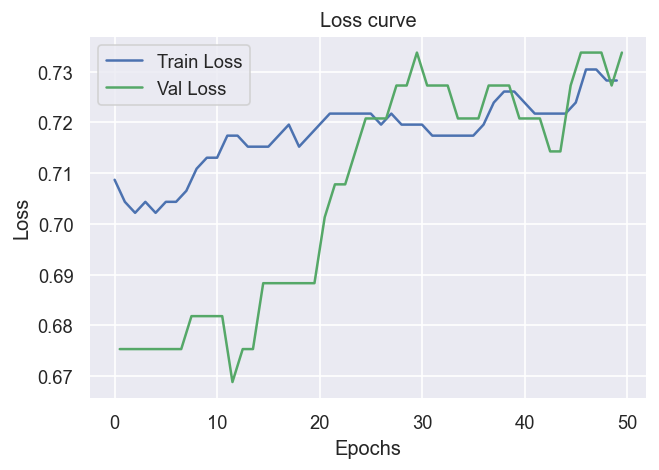

Max Validation Accuracy = 0.33116883116883117

Learning Rate = 1e-05 | Loss Type = perceptron | Bias = True


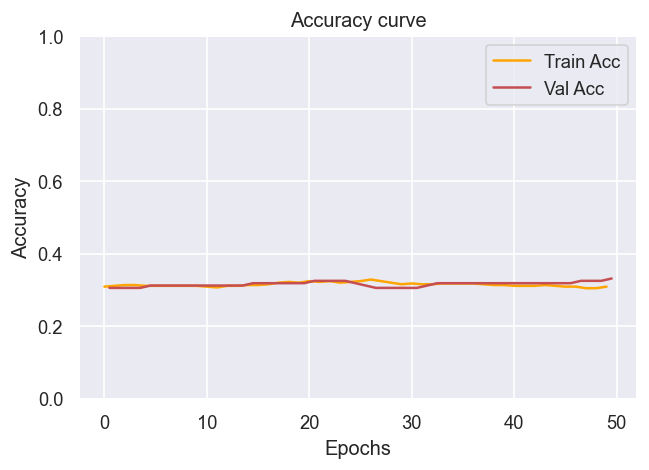

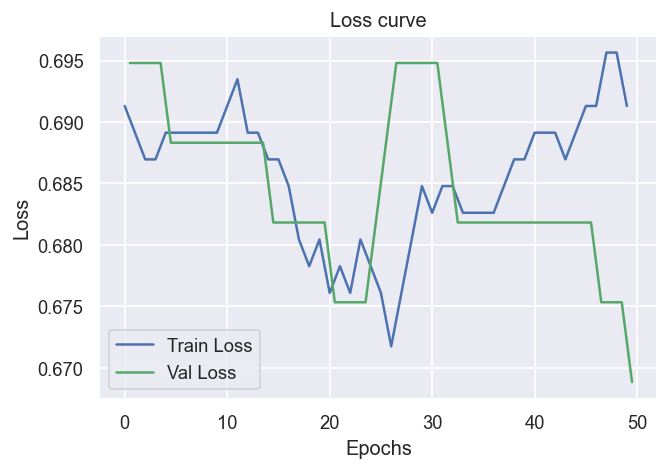

Max Validation Accuracy = 0.33116883116883117

Learning Rate = 1e-05 | Loss Type = perceptron | Bias = False


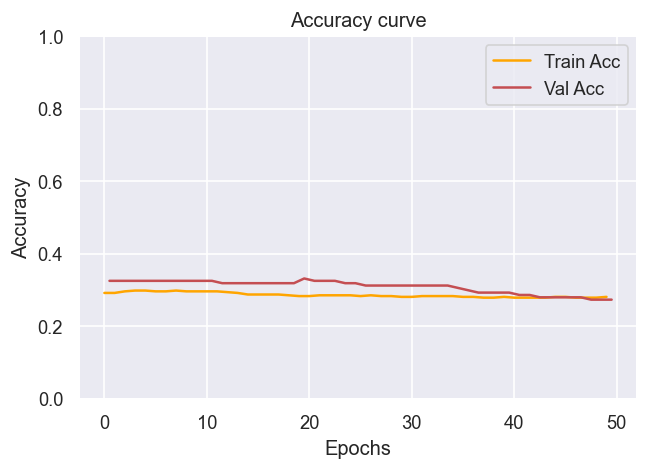

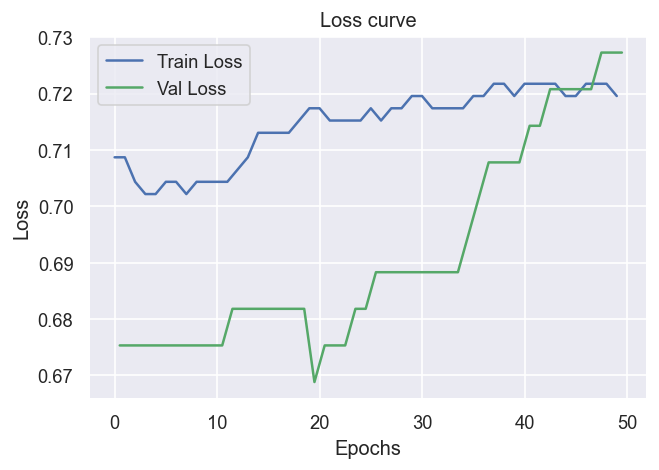

Max Validation Accuracy = 0.33116883116883117

Learning Rate = 0.0001 | Loss Type = zero_one | Bias = True


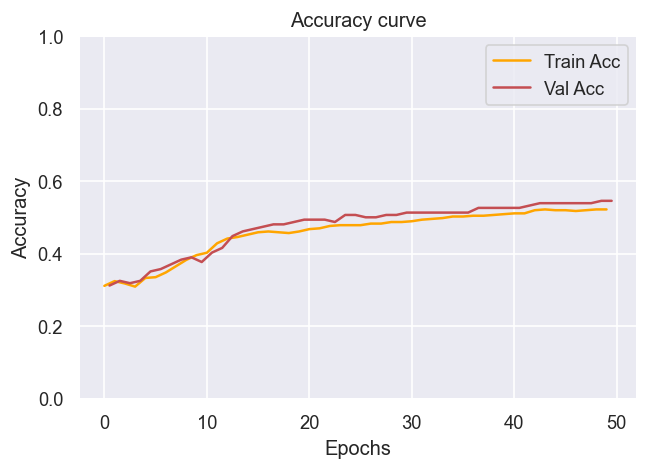

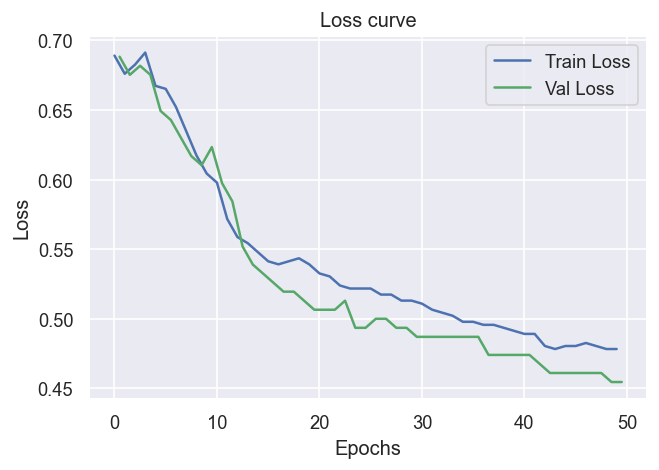

Max Validation Accuracy = 0.5454545454545454

Learning Rate = 0.0001 | Loss Type = zero_one | Bias = False


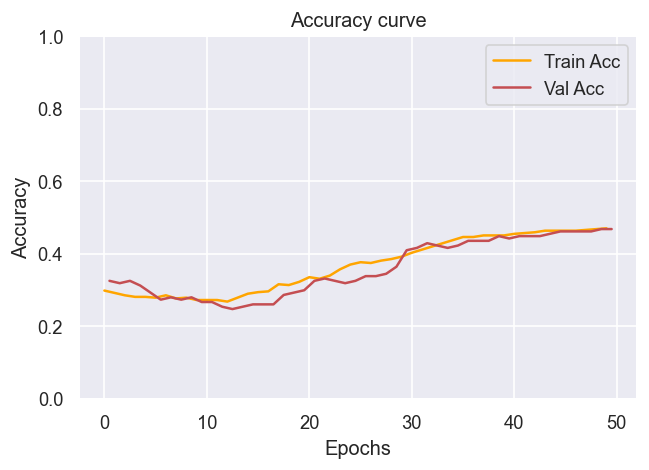

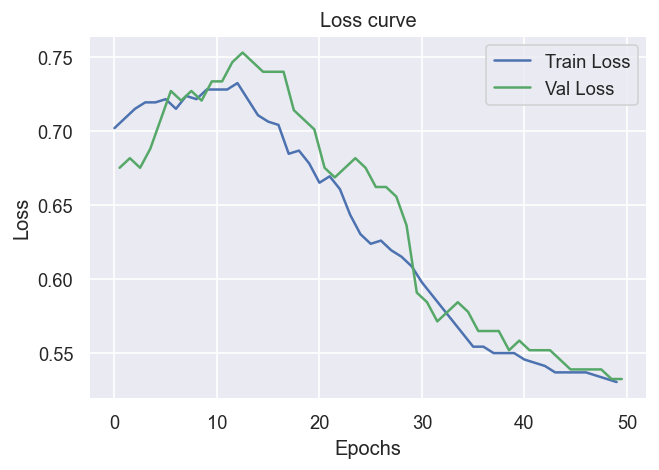

Max Validation Accuracy = 0.4675324675324675

Learning Rate = 0.0001 | Loss Type = hinge | Bias = True


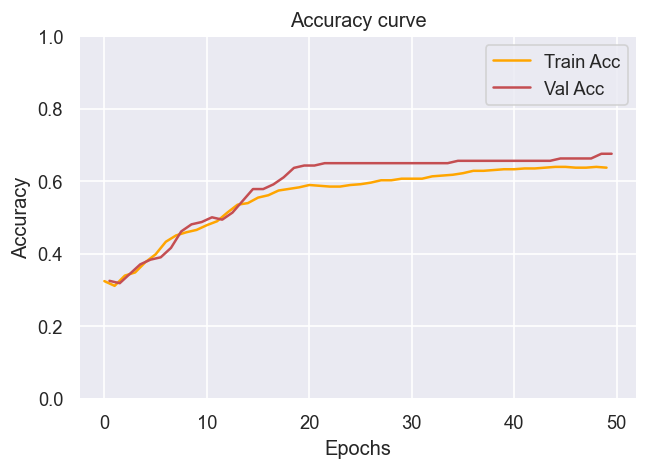

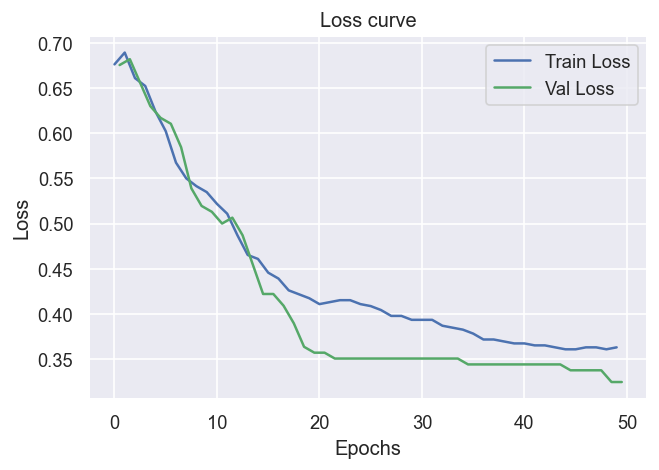

Max Validation Accuracy = 0.6753246753246753

Learning Rate = 0.0001 | Loss Type = hinge | Bias = False


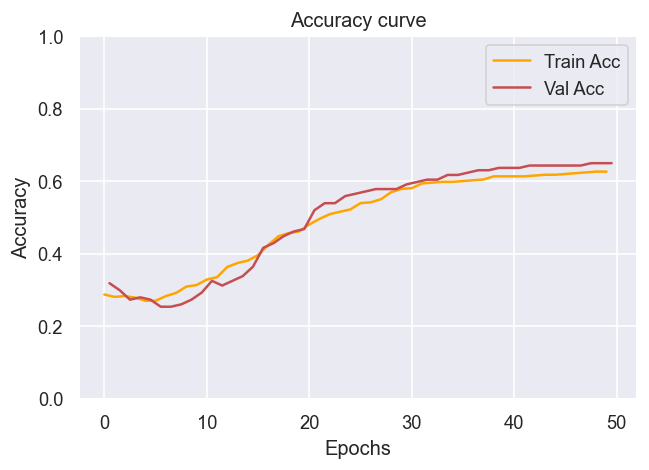

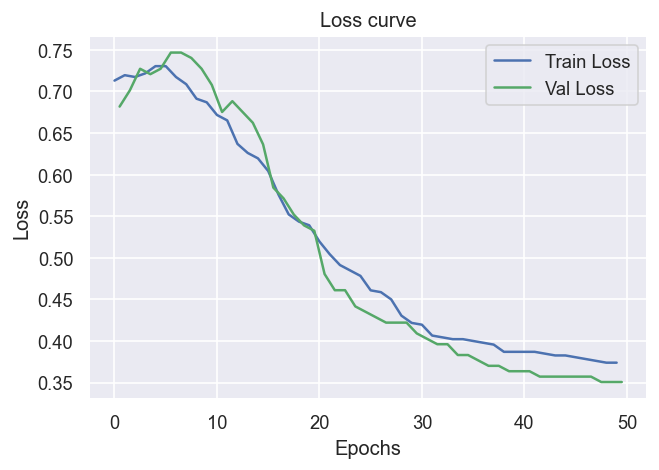

Max Validation Accuracy = 0.6493506493506493

Learning Rate = 0.0001 | Loss Type = perceptron | Bias = True


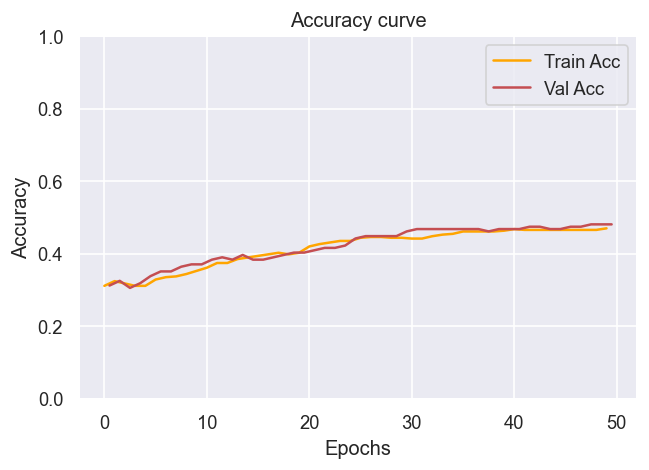

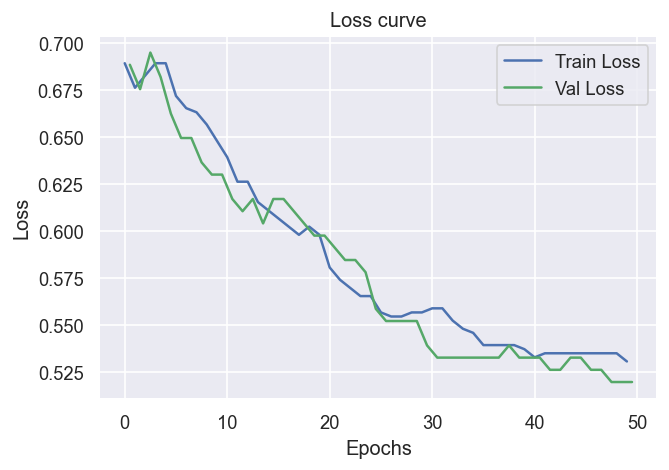

Max Validation Accuracy = 0.4805194805194805

Learning Rate = 0.0001 | Loss Type = perceptron | Bias = False


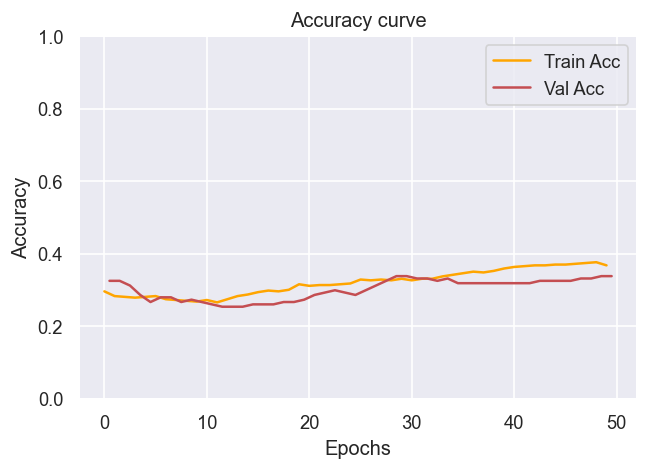

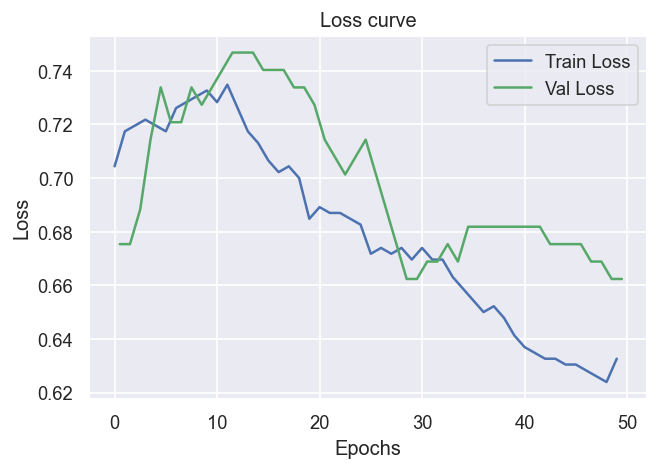

Max Validation Accuracy = 0.33766233766233766

Learning Rate = 0.001 | Loss Type = zero_one | Bias = True


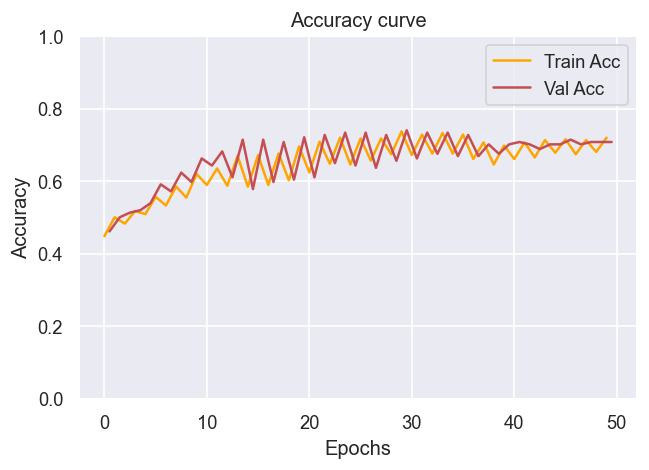

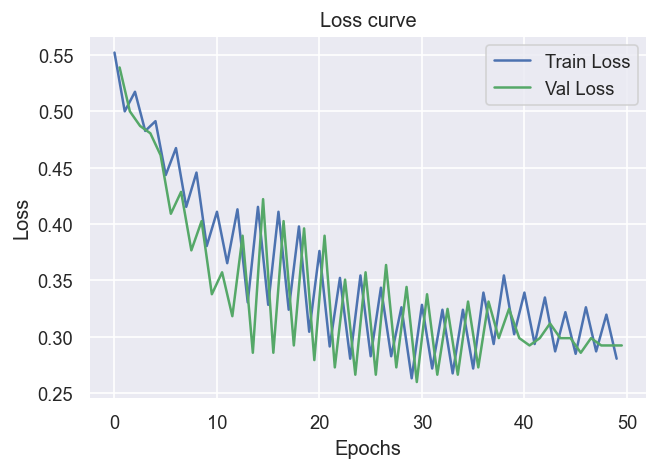

Max Validation Accuracy = 0.7402597402597403

Learning Rate = 0.001 | Loss Type = zero_one | Bias = False


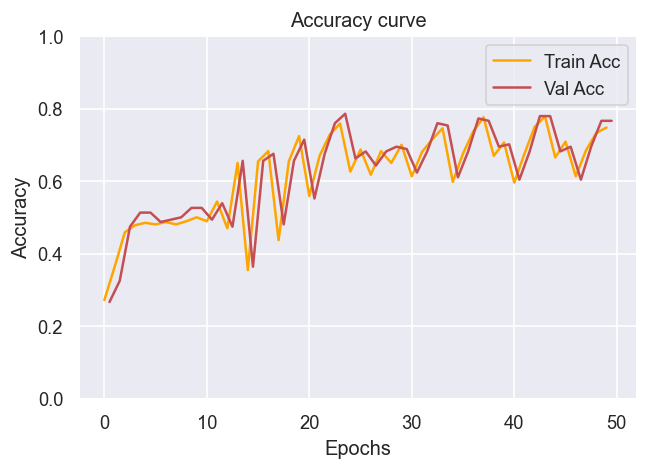

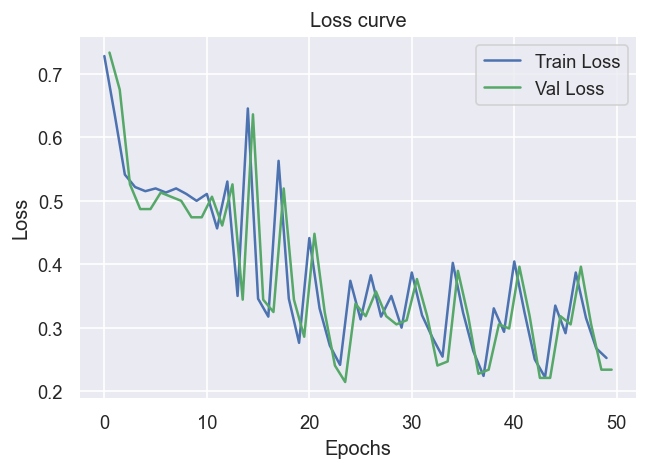

Max Validation Accuracy = 0.7857142857142857

Learning Rate = 0.001 | Loss Type = hinge | Bias = True


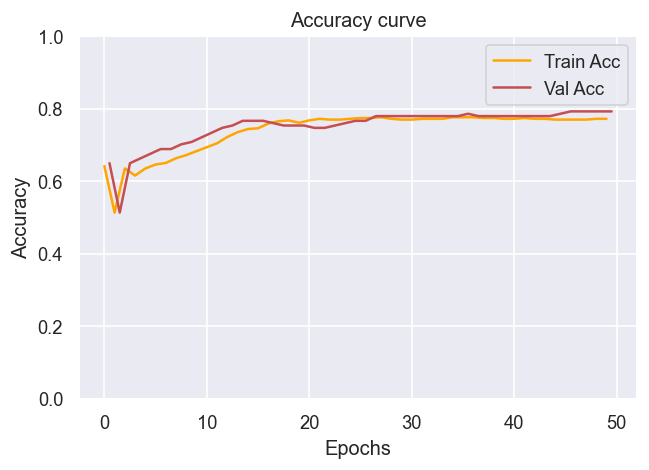

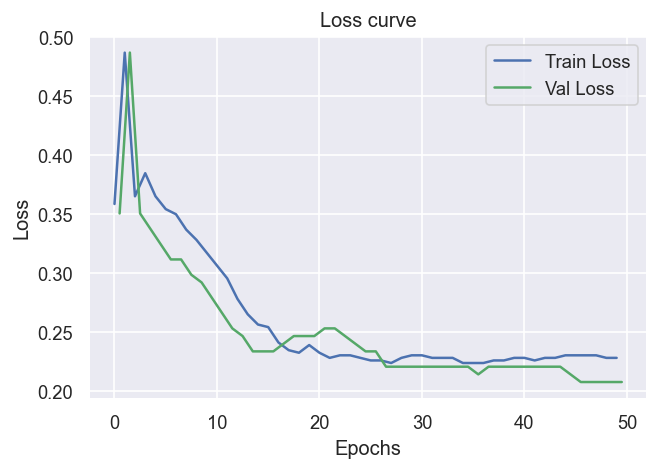

Max Validation Accuracy = 0.7922077922077922

Learning Rate = 0.001 | Loss Type = hinge | Bias = False


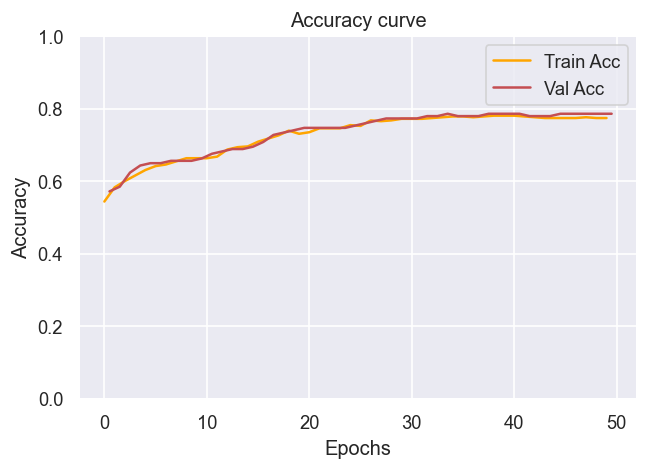

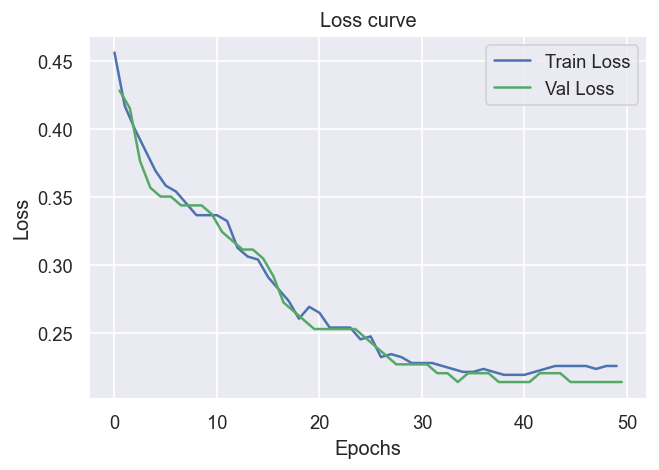

Max Validation Accuracy = 0.7857142857142857

Learning Rate = 0.001 | Loss Type = perceptron | Bias = True


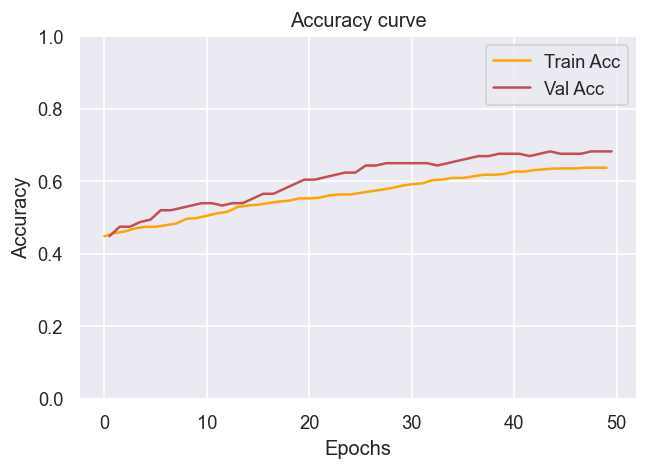

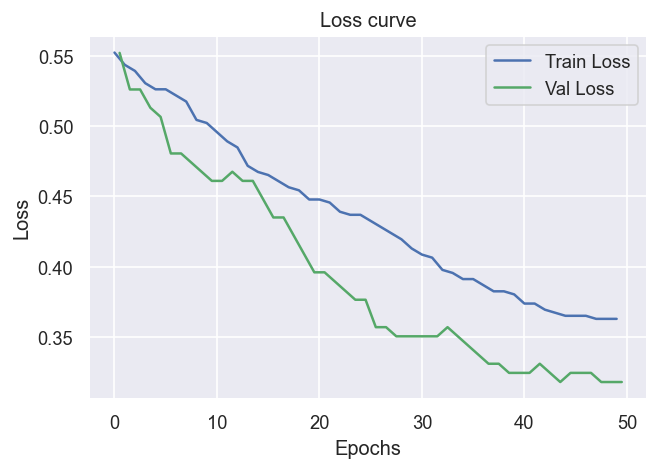

Max Validation Accuracy = 0.6818181818181818

Learning Rate = 0.001 | Loss Type = perceptron | Bias = False


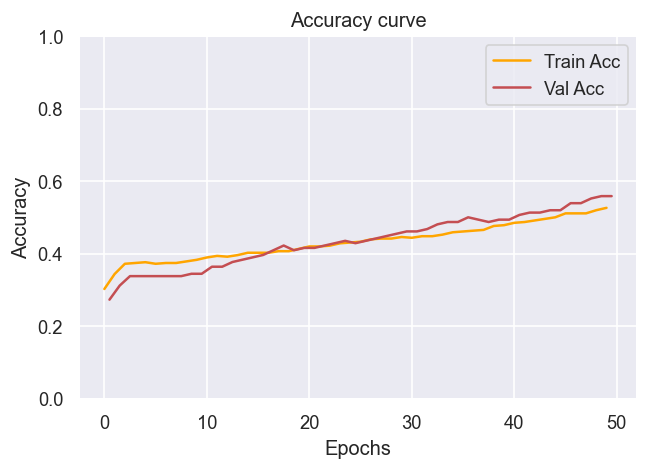

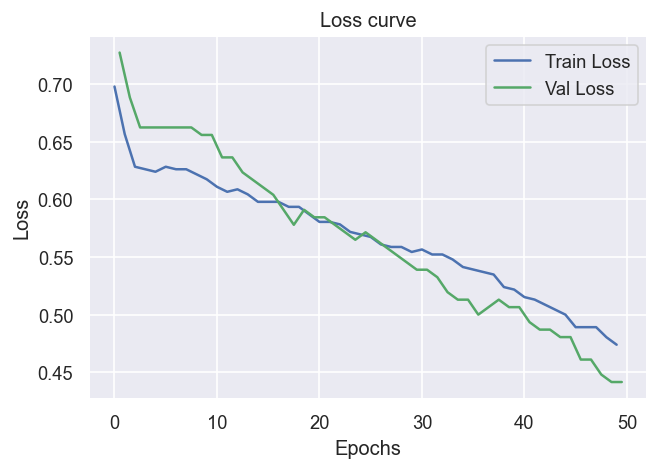

Max Validation Accuracy = 0.5584415584415584

Learning Rate = 0.01 | Loss Type = zero_one | Bias = True


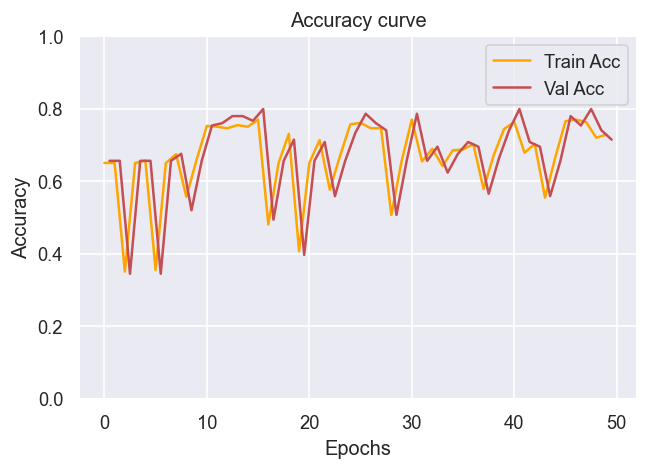

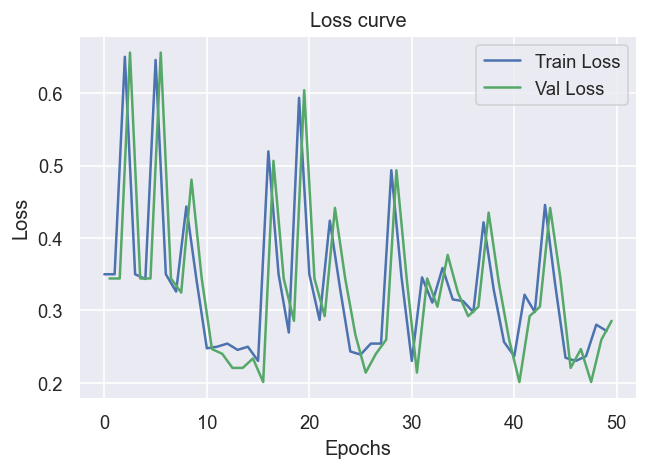

Max Validation Accuracy = 0.7987012987012987

Learning Rate = 0.01 | Loss Type = zero_one | Bias = False


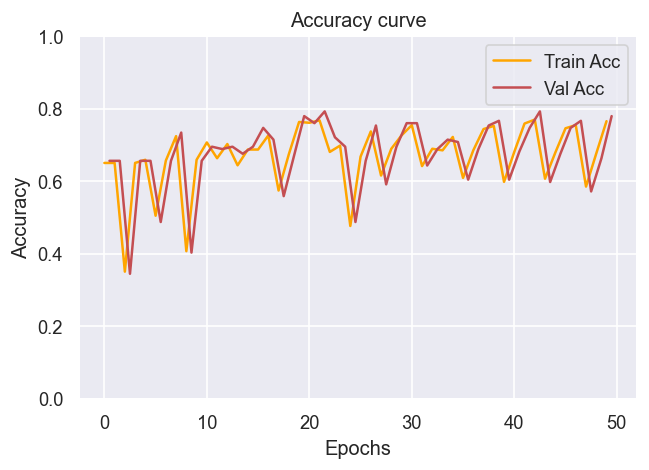

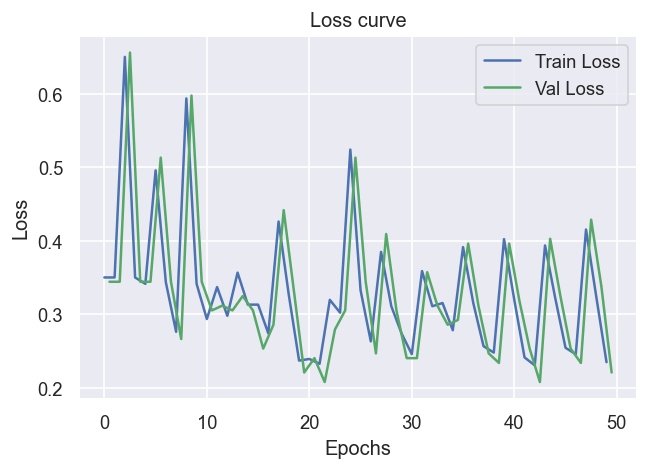

Max Validation Accuracy = 0.7922077922077922

Learning Rate = 0.01 | Loss Type = hinge | Bias = True


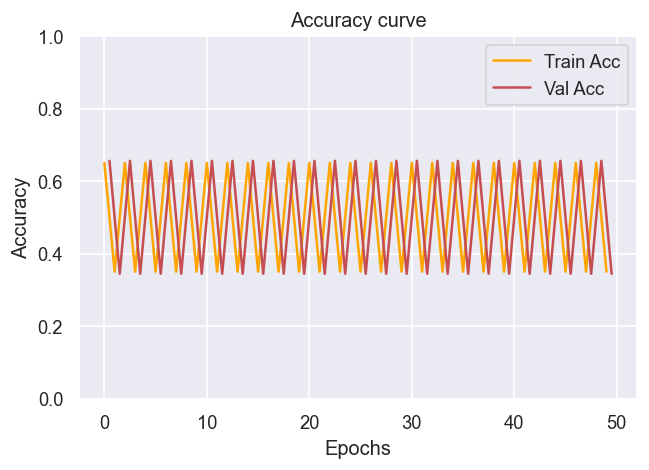

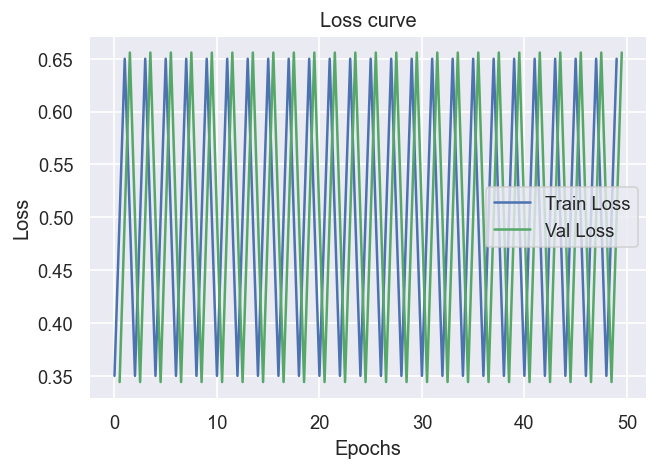

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 0.01 | Loss Type = hinge | Bias = False


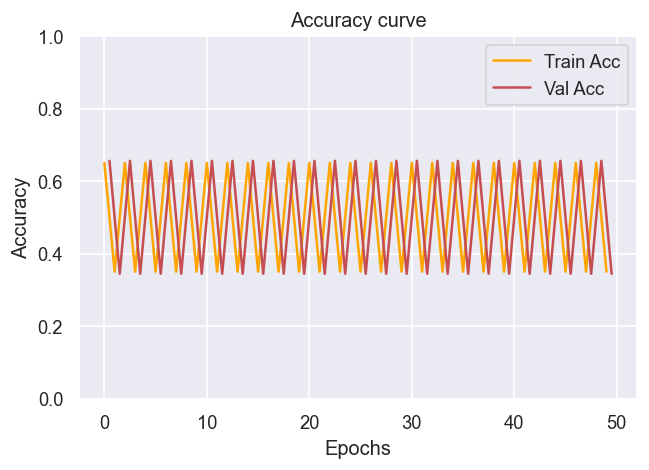

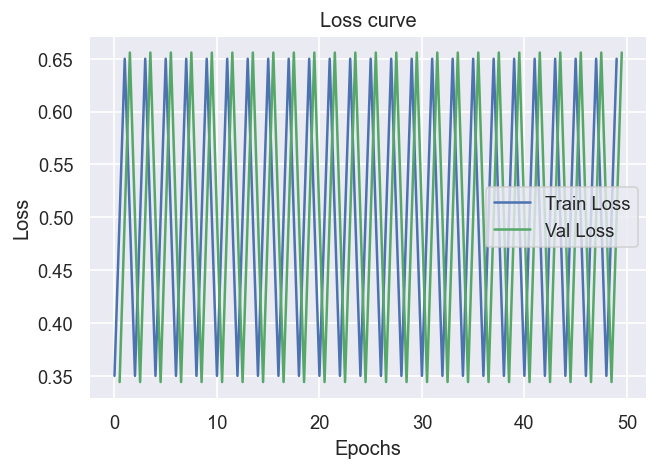

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 0.01 | Loss Type = perceptron | Bias = True


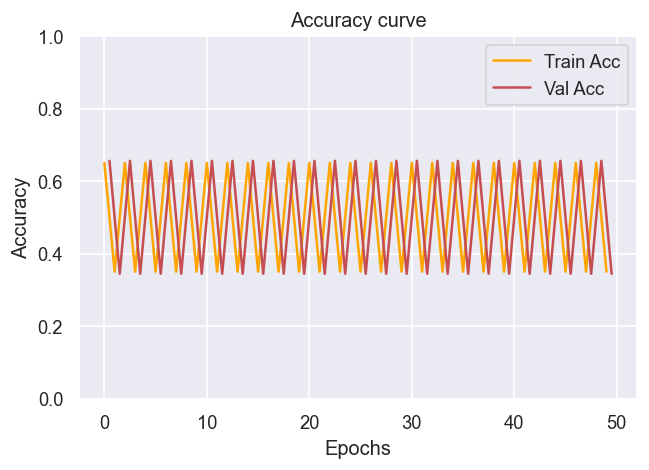

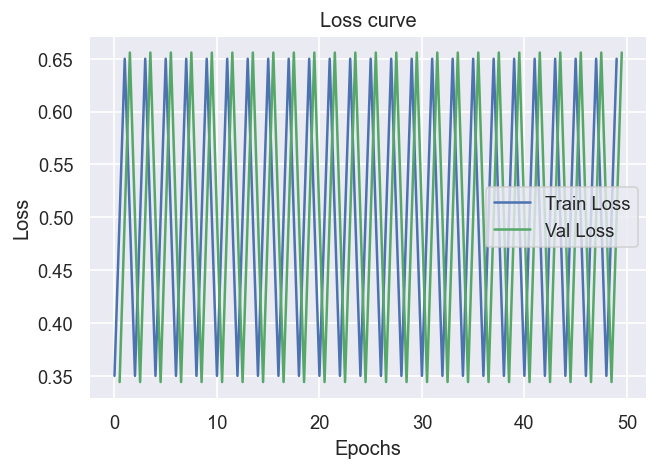

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 0.01 | Loss Type = perceptron | Bias = False


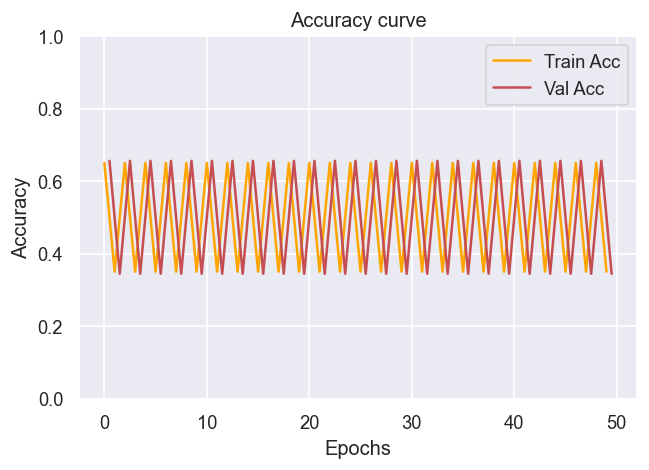

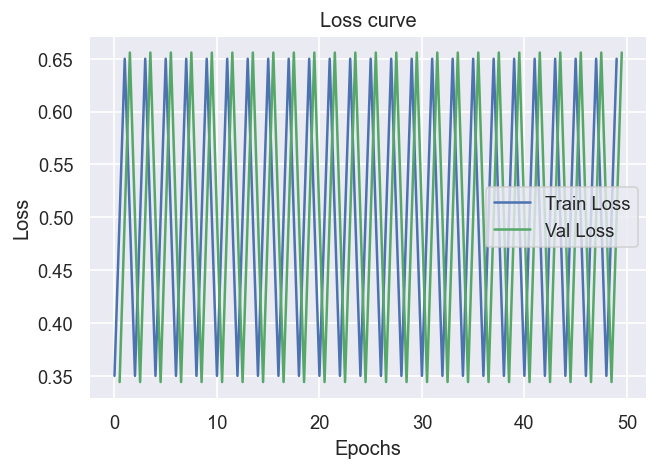

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 0.1 | Loss Type = zero_one | Bias = True


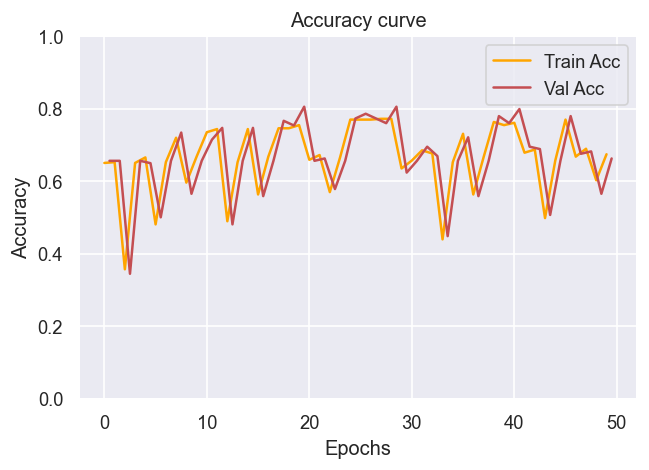

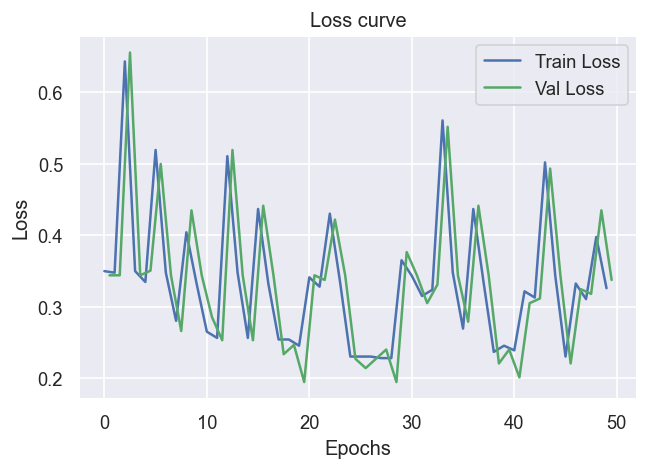

Max Validation Accuracy = 0.8051948051948052

Learning Rate = 0.1 | Loss Type = zero_one | Bias = False


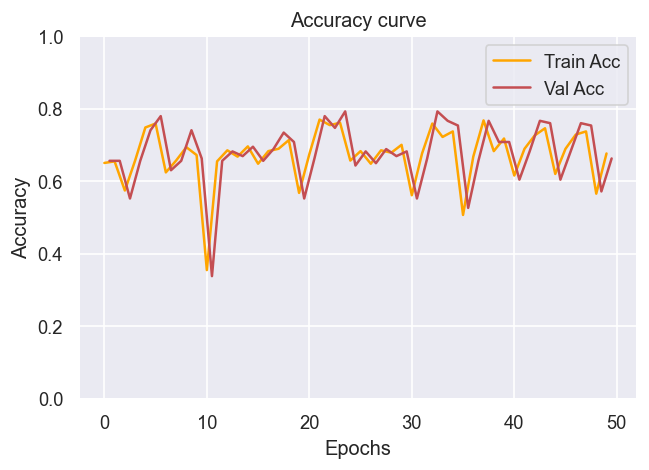

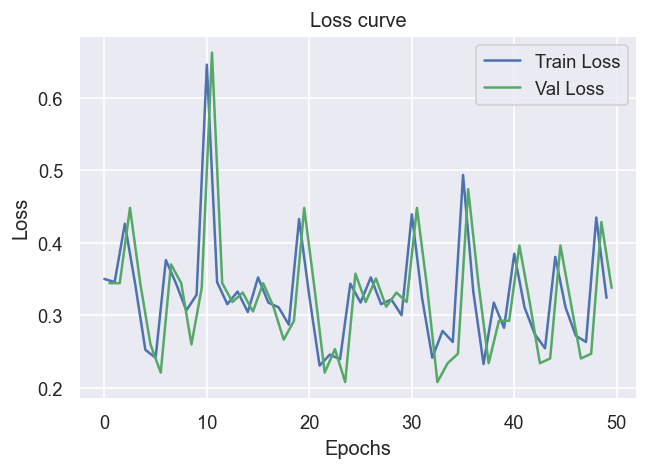

Max Validation Accuracy = 0.7922077922077922

Learning Rate = 0.1 | Loss Type = hinge | Bias = True


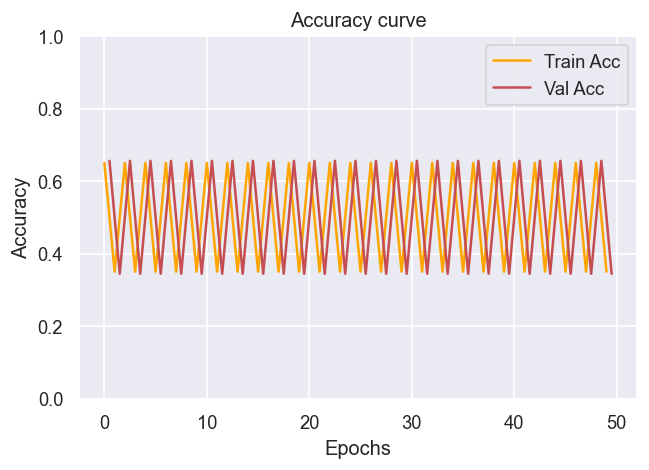

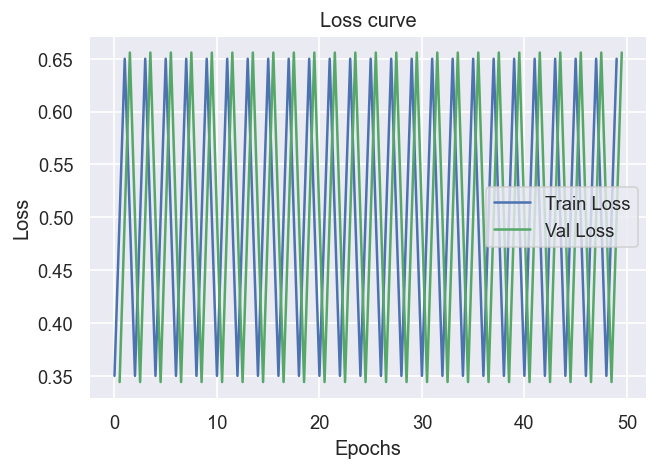

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 0.1 | Loss Type = hinge | Bias = False


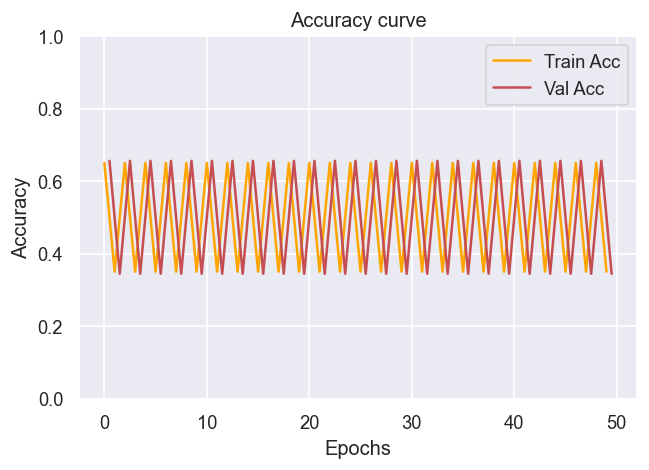

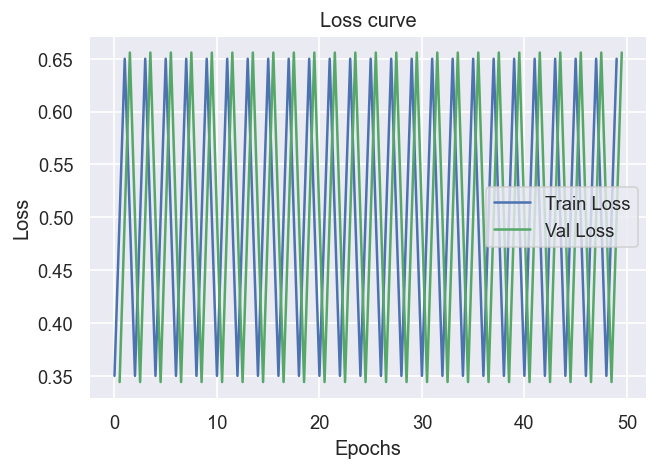

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 0.1 | Loss Type = perceptron | Bias = True


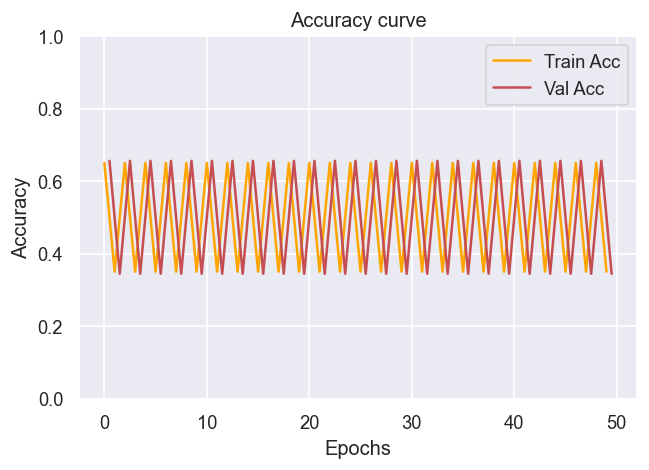

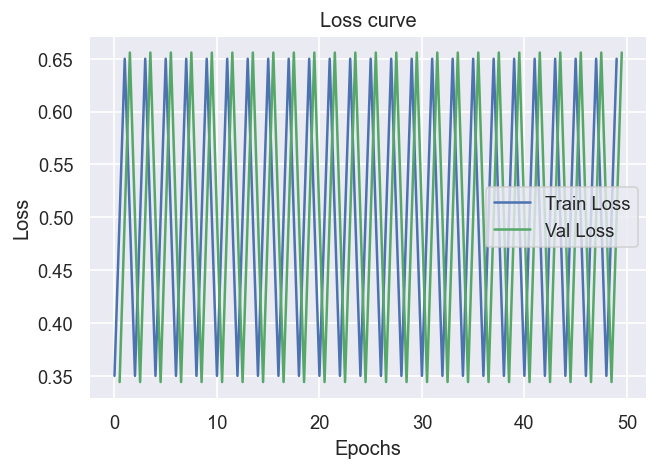

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 0.1 | Loss Type = perceptron | Bias = False


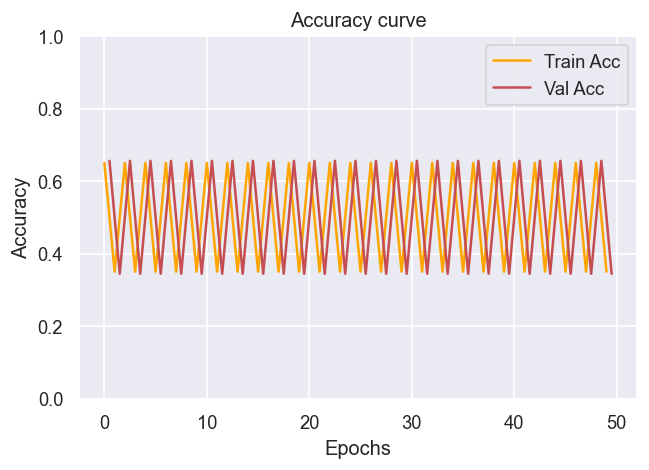

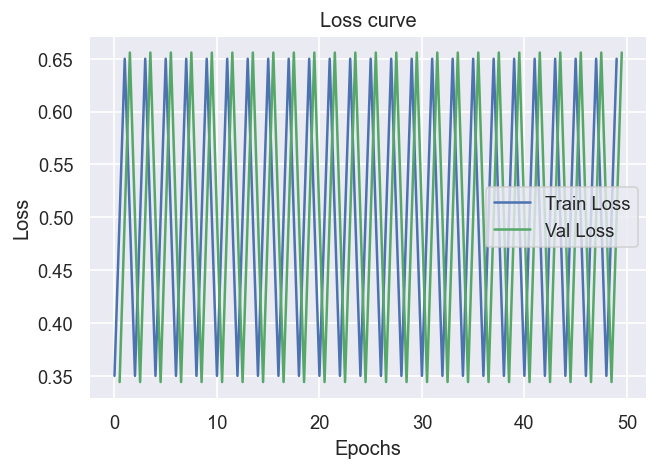

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 1 | Loss Type = zero_one | Bias = True


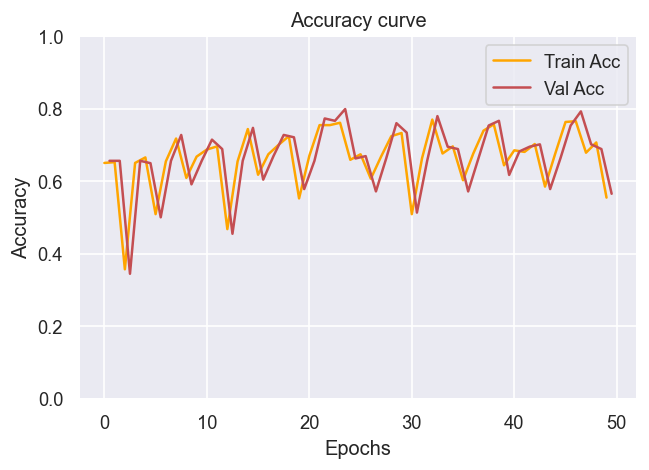

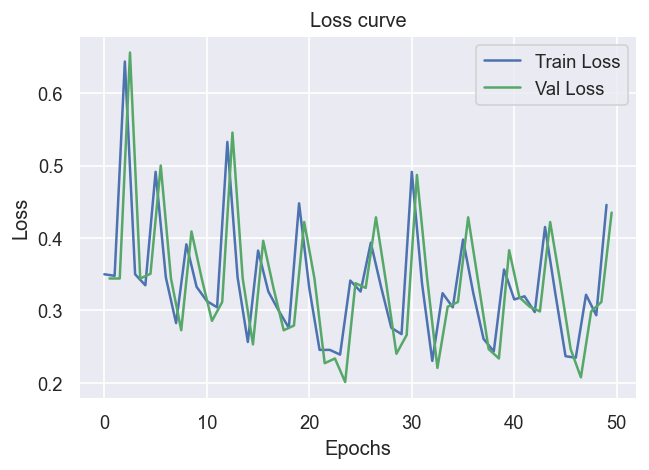

Max Validation Accuracy = 0.7987012987012987

Learning Rate = 1 | Loss Type = zero_one | Bias = False


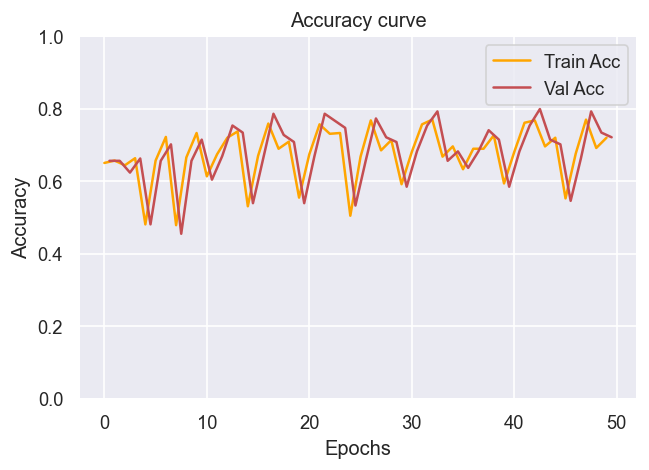

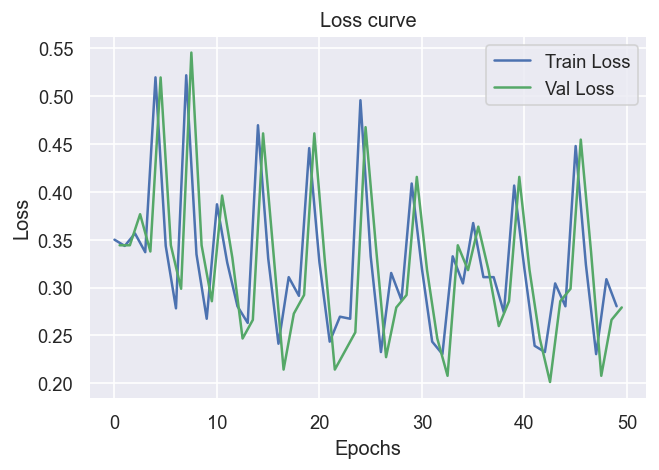

Max Validation Accuracy = 0.7987012987012987

Learning Rate = 1 | Loss Type = hinge | Bias = True


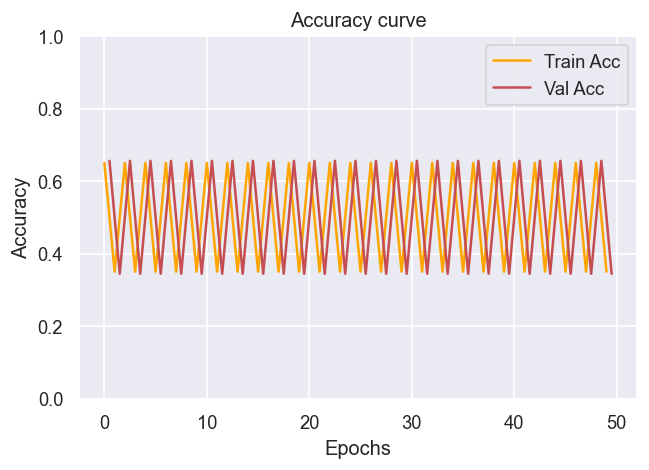

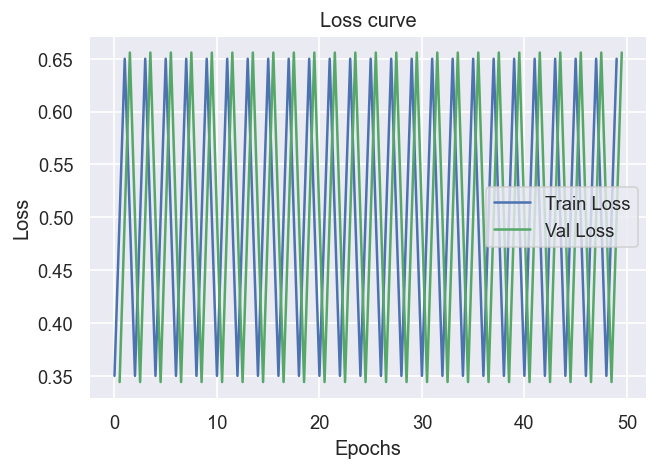

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 1 | Loss Type = hinge | Bias = False


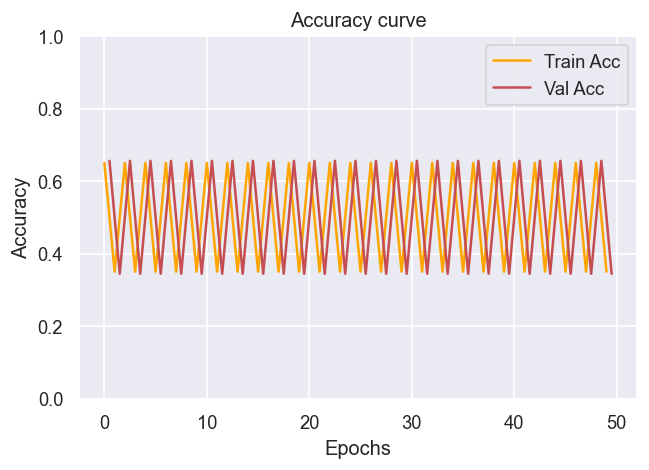

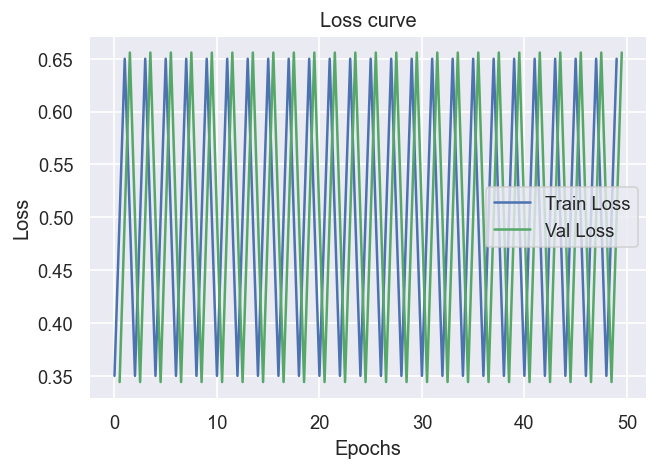

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 1 | Loss Type = perceptron | Bias = True


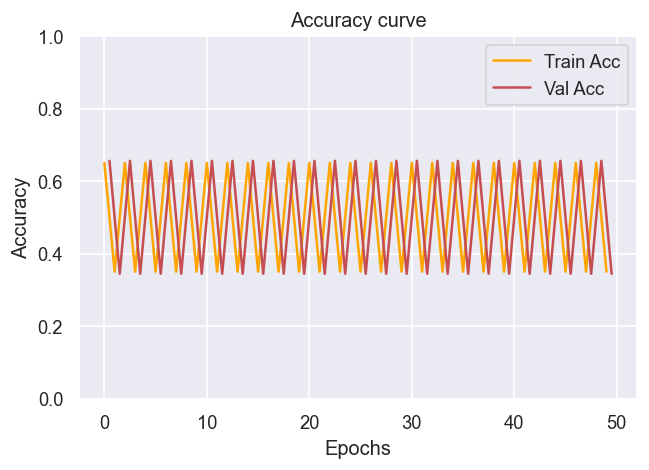

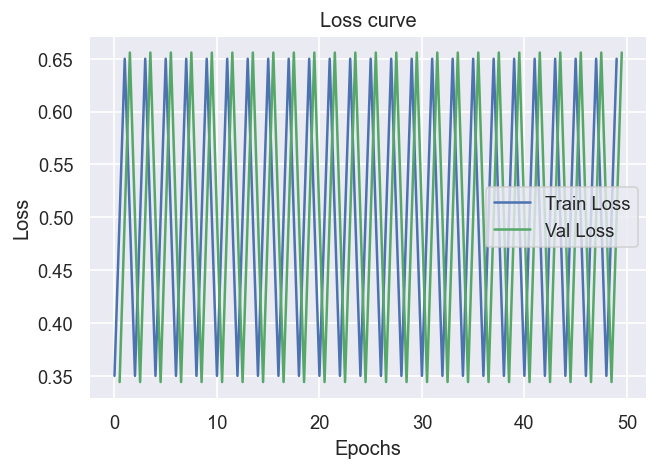

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 1 | Loss Type = perceptron | Bias = False


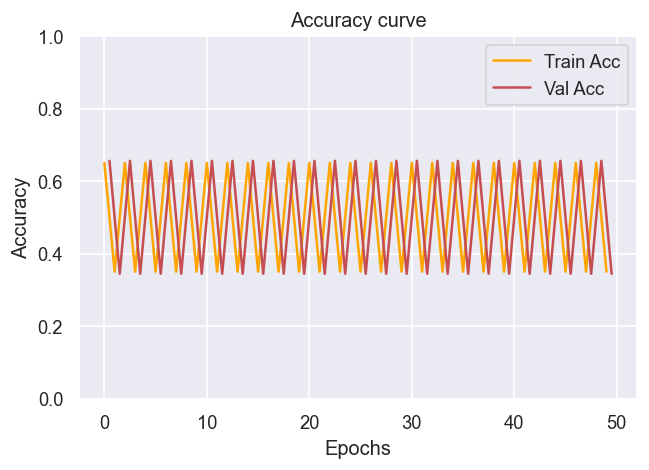

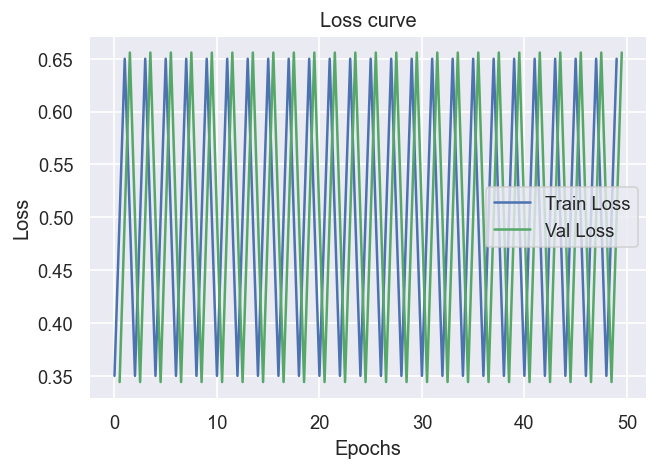

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 10 | Loss Type = zero_one | Bias = True


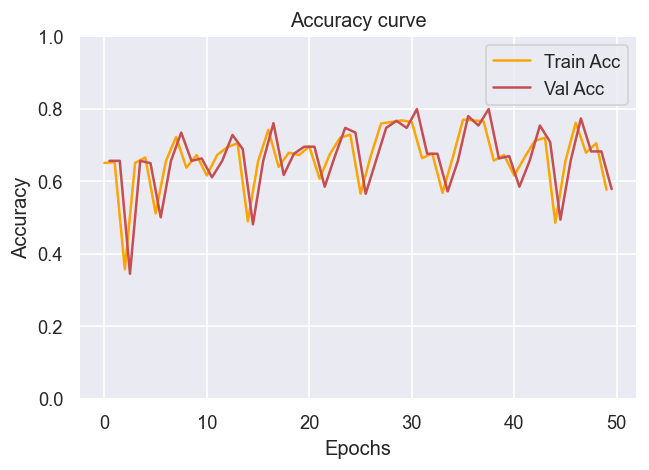

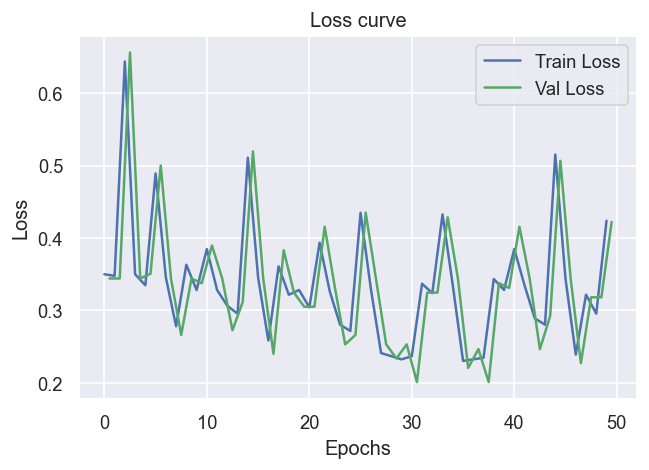

Max Validation Accuracy = 0.7987012987012987

Learning Rate = 10 | Loss Type = zero_one | Bias = False


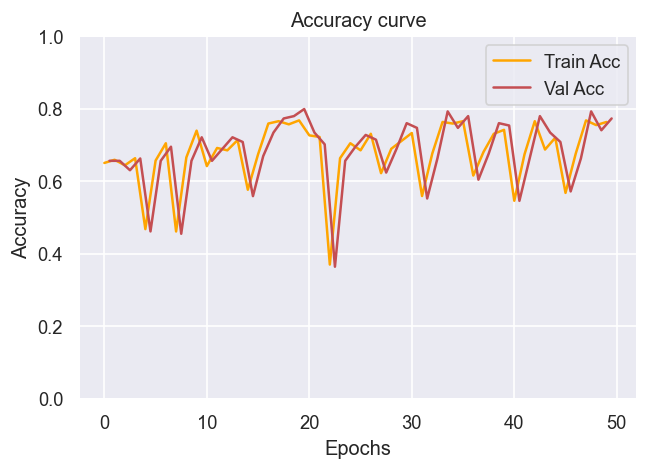

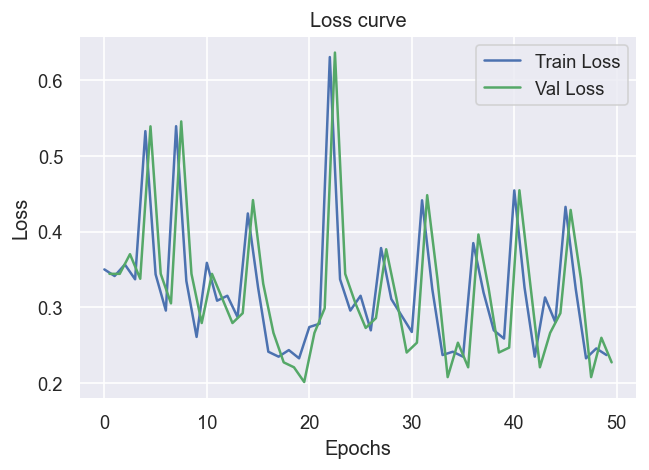

Max Validation Accuracy = 0.7987012987012987

Learning Rate = 10 | Loss Type = hinge | Bias = True


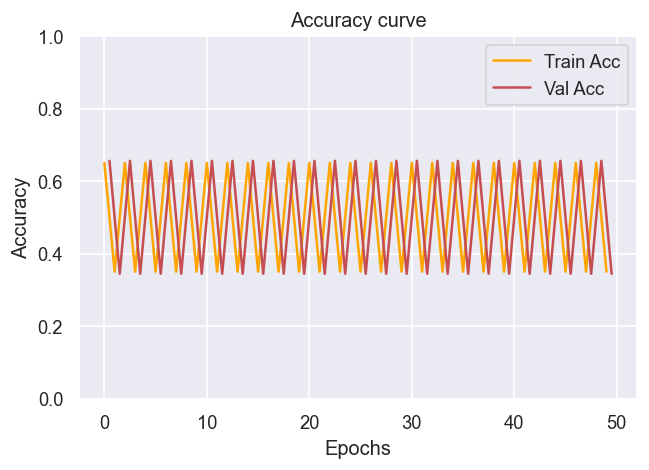

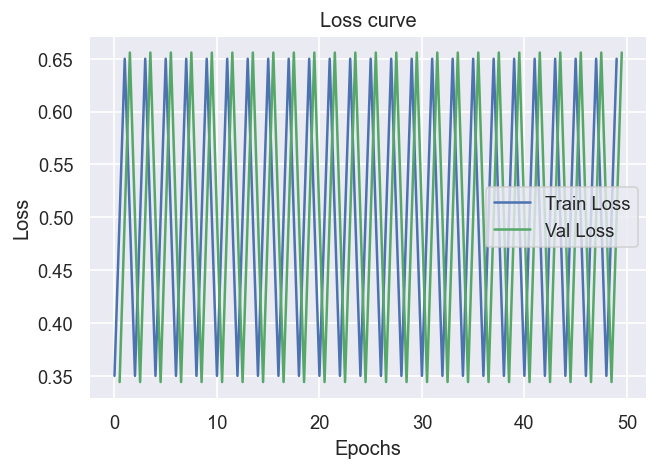

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 10 | Loss Type = hinge | Bias = False


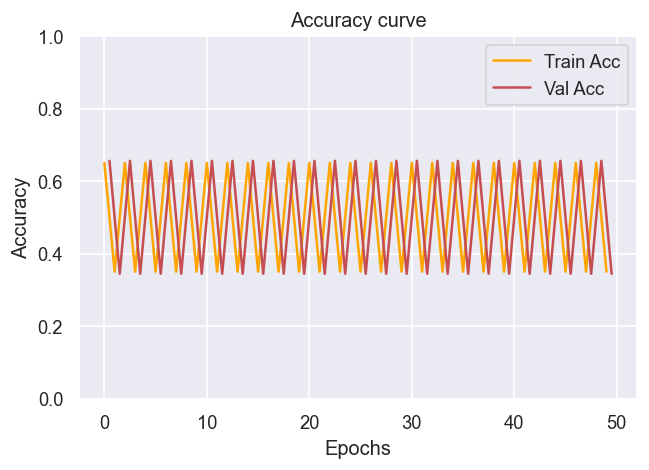

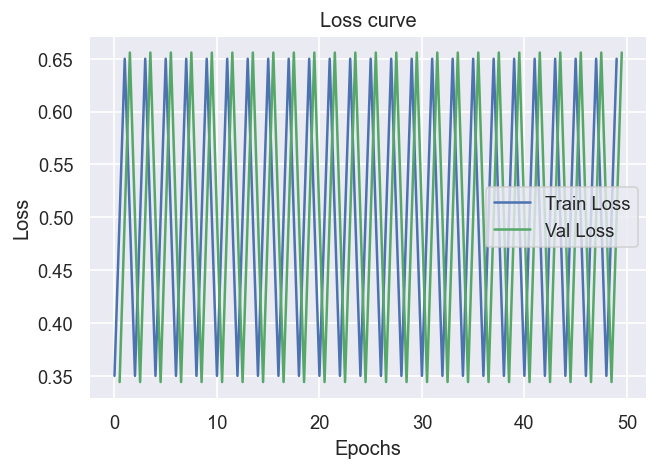

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 10 | Loss Type = perceptron | Bias = True


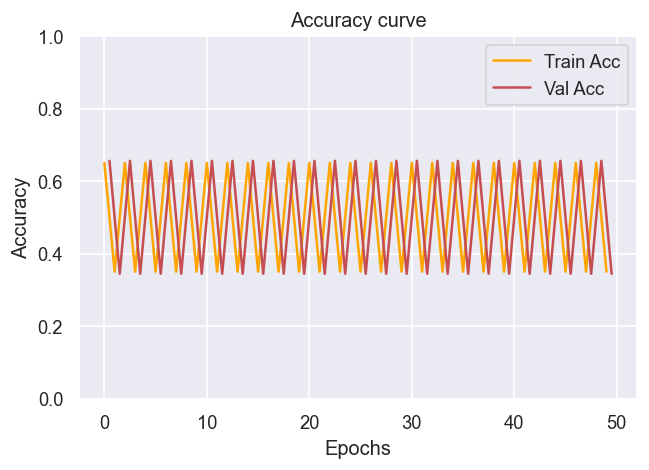

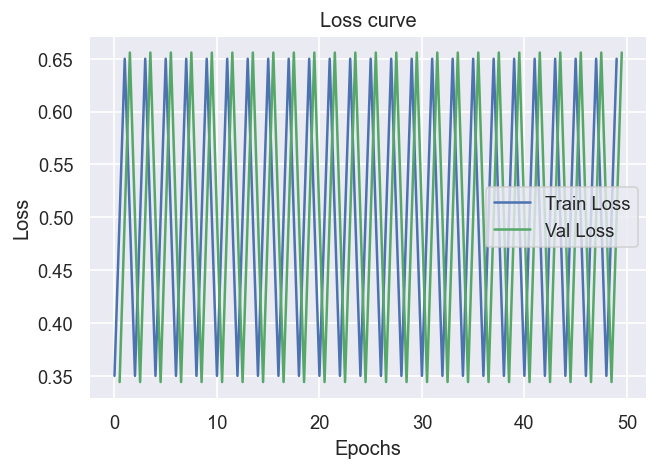

Max Validation Accuracy = 0.6558441558441559

Learning Rate = 10 | Loss Type = perceptron | Bias = False


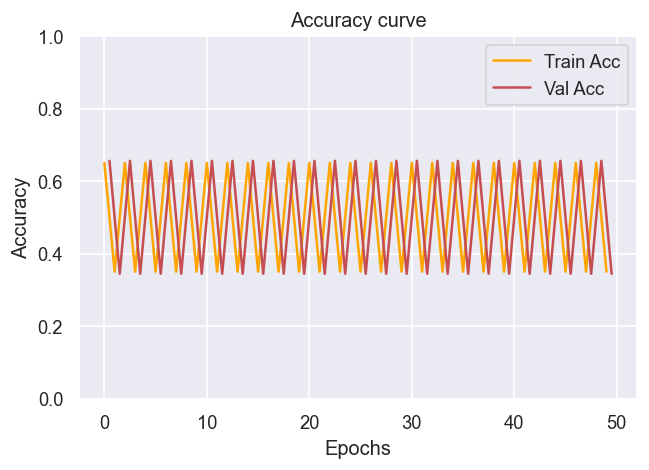

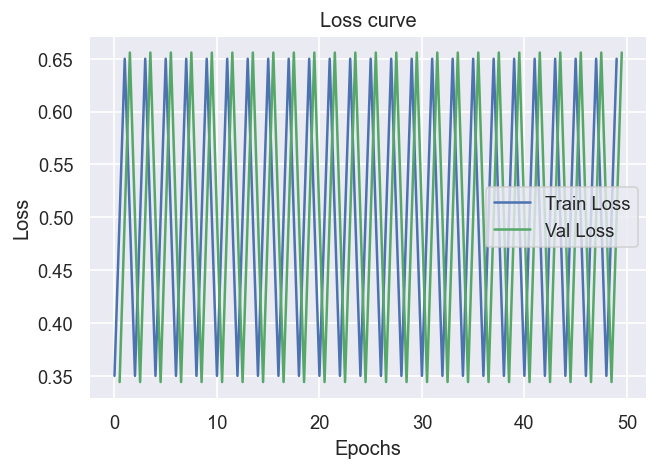

Max Validation Accuracy = 0.6558441558441559



In [17]:
learn_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
loss_types = ['zero_one', 'hinge', 'perceptron']
bias_term = [True, False]
results = []
for lr in learn_rates:
    for lt in loss_types:
        for b in bias_term:
            print("Learning Rate =", lr, "| Loss Type =", lt, "| Bias =", b)
            perceptron_results = Perceptron_Base(X_train, y_train, X_val, y_val, learning_rate = lr, loss_type=lt, bias = b)
            print("Max Validation Accuracy =", perceptron_results.iloc[0][6])
            print()
            #save the best epoch which returns the highest validation accuracy
            results += [perceptron_results.iloc[0]]

# Results and Analysis

In [18]:
results = pd.DataFrame(results, columns=['Epoch', 'Learning Rate', 'Bias', 'Loss type', 'Weights', 
                                            'Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'], index = None)
results = results.sort_values('Validation Accuracy', ascending=False, ignore_index = True)

In [19]:
results

Epoch  Learning Rate   Bias   Loss type  \
0      28        0.10000   True    zero_one   
1      23        1.00000   True    zero_one   
2      19       10.00000  False    zero_one   
3      30       10.00000   True    zero_one   
4      47        0.01000   True    zero_one   
5      42        1.00000  False    zero_one   
6      32        0.10000  False    zero_one   
7      49        0.00100   True       hinge   
8      42        0.01000  False    zero_one   
9      49        0.00100  False       hinge   
10     23        0.00100  False    zero_one   
11     29        0.00100   True    zero_one   
12     49        0.00100   True  perceptron   
13     49        0.00010   True       hinge   
14      0        1.00000   True       hinge   
15      0        0.10000   True       hinge   
16      0        1.00000  False       hinge   
17      0        1.00000   True  perceptron   
18      0        1.00000  False  perceptron   
19      0       10.00000   True       hinge   
20      0       10.00000  False       hinge   
21      0        0.10000  False  perceptron   
22      0        0.10000   True  perceptron   
23      0        0.10000  False       hinge   
24      0       10.00000   True  perceptron   
25      0        0.01000  False       hinge   
26      0       10.00000  False  perceptron   
27      0        0.01000  False  perceptron   
28      0        0.01000   True  perceptron   
29      0        0.01000   True       hinge   
30     49        0.00010  False       hinge   
31     49        0.00100  False  perceptron   
32     49        0.00010   True    zero_one   
33     49        0.00010   True  perceptron   
34     49        0.00010  False    zero_one   
35     49        0.00001   True       hinge   
36     49        0.00001   True    zero_one   
37     49        0.00010  False  perceptron   
38     26        0.00001  False    zero_one   
39     19        0.00001  False  perceptron   
40     49        0.00001   True  perceptron   
41     11        0.00001  False       hinge   

                                              Weights  Training Accuracy  \
0   [-3.9988849882567905, -8.315463772203824, -26....           0.771739   
1   [-56.39888498825678, -102.29199692220266, -331...           0.760870   
2   [-532.5671448811432, -2272.8180149935893, 351....           0.767391   
3   [-529.3988849882567, -1010.4692974221892, -327...           0.763043   
4   [-0.3288849882567914, -1.1172228372039326, -3....           0.763043   
5   [-82.9196863811511, -271.9135878135902, 56.043...           0.767391   
6   [-8.807822031152508, -28.352299954590066, 3.74...           0.758696   
7   [0.14958140730454078, -0.2613856428335383, -1....           0.771739   
8   [-0.86899049115262, -2.582652244190084, 0.5864...           0.769565   
9   [-0.3431730837881367, -1.0934532969344002, 0.1...           0.773913   
10  [-0.13157761665263645, -0.18048154516008375, 0...           0.758696   
11  [0.2981150117432087, -0.024456987203953805, -0...           0.736957   
12  [0.3763152662375449, 0.11373230969246913, -0.3...           0.636957   
13  [0.6967958955445376, 0.2666492206759508, -0.32...           0.636957   
14  [399.43674226327755, -330.95690173896287, -8.8...           0.650000   
15  [40.48467773689665, -32.45842485387985, -0.865...           0.650000   
16  [-414.03992096750494, -20.98412760372363, 13.1...           0.650000   
17  [207.59864633090714, -170.94087333239926, 5.07...           0.650000   
18  [-251.11858085915088, -4.317772856218458, 3.64...           0.650000   
19  [3988.9573875270867, -3315.941670589793, -88.6...           0.650000   
20  [-4143.770070744676, -218.39770479492555, 125....           0.650000   
21  [-24.77477197895246, 0.4238655901470787, 1.023...           0.650000   
22  [21.300868143659603, -16.456822013223487, 0.52...           0.650000   
23  [-41.06690598978787, -1.2427698846034385, 1.97...           0.650000   
24  [2070.5764282033824, -1715.7813865241574, 50.5...           0.650000   
25  [-

In [20]:
#printing the hyperparameters of the best model
results.iloc[0]

Epoch                                                                 28
Learning Rate                                                        0.1
Bias                                                                True
Loss type                                                       zero_one
Weights                [-3.9988849882567905, -8.315463772203824, -26....
Training Accuracy                                               0.771739
Validation Accuracy                                             0.805195
Training Loss                                                   0.228261
Validation Loss                                                 0.194805
Name: 0, dtype: object

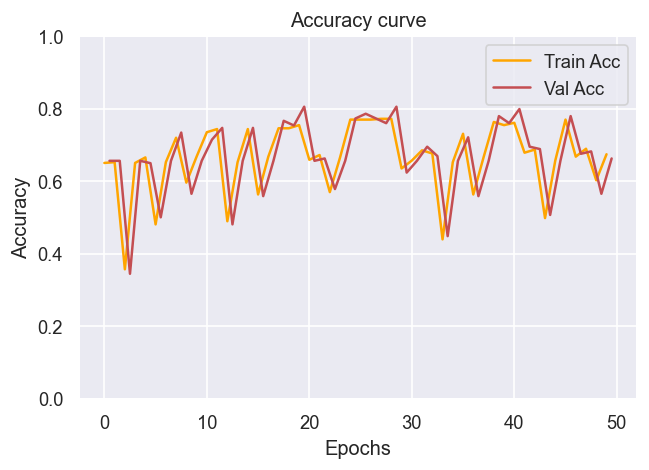

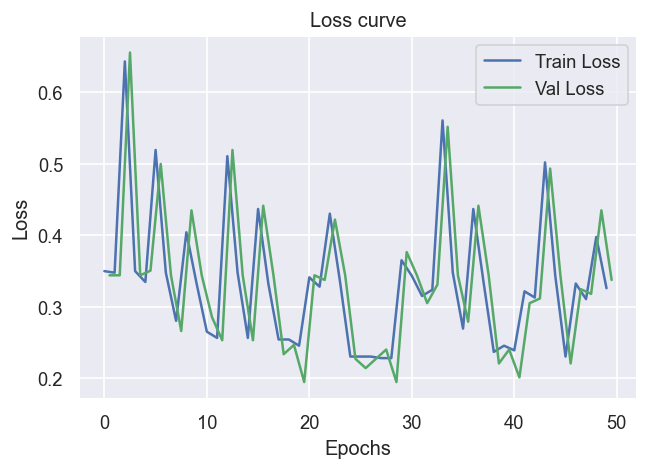

Test Accuracy = 75.97 %


In [21]:
#training the best model again on the training set with the best hyperparameters
best_model = Perceptron_Base(X_train, y_train, X_val, y_val, epochs = 50, learning_rate = 0.1, loss_type='zero_one', bias = True)
best_weights = best_model['Weights'].iloc[0]

X_test_bias = add_bias(X_test)
best_weights_preds = get_predictions(X_test_bias, best_weights)
print("Test Accuracy =", round(pred_accuracy(y_test, best_weights_preds)*100, 2), '%')

Text(0.5, 1.0, 'Confusion Matrix')

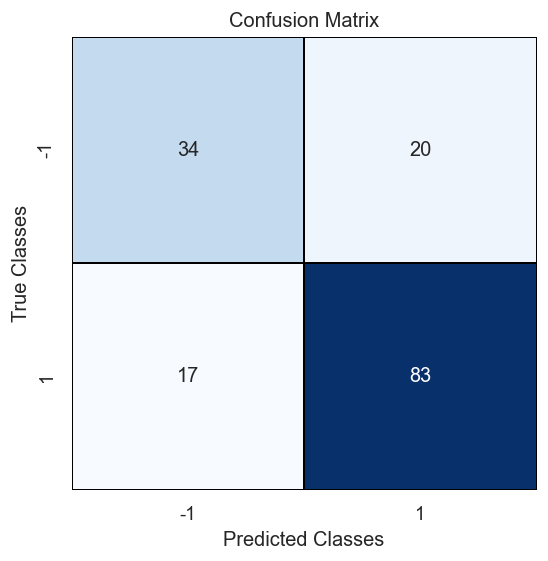

In [22]:
#confusion matrix to display the distribution of predicitions
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, best_weights_preds)
classes = [-1, 1]
cm_best = pd.DataFrame(matrix, index = classes , columns = classes)
plt.figure(figsize = (5, 5))
sns.heatmap(cm_best, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', cbar = False)
plt.ylabel("True Classes")
plt.xlabel("Predicted Classes")
plt.title("Confusion Matrix")

In [23]:
#calculate sensitivity and specificity
from sklearn.metrics import recall_score
print("Sensitivity =", round(recall_score(y_test, best_weights_preds), 3))
print("Specificity =", round(recall_score(y_test, best_weights_preds, pos_label = -1), 3))

Sensitivity = 0.83
Specificity = 0.63
